# Grafs per estudiar una xarxa

In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import random

In [3]:
from tqdm import tqdm_notebook # pip install --user tqdm

## Definició d'un graf

Hi ha xarxes que es representen com un grafs $G$, que és una entitat matemàtica formada per un conjunt no buit $V$ d’elements que anomenem **vèrtexs, punts o nodes** i una col·lecció $E$ de parelles desordenades de vèrtexs que anomenem **arestes** o enllaços i que simbòlicament es representa com $G = (V, E)$. 
El nombre de nodes representa la **mida de la xarxa**.

En general ens referim a un vèrtex particular pel seu ordre $i$ en el conjunt $V$ i els seus dos vèrtexs, $i$ i $j$, rebran el nom d’**adjacents** (o connectats) si existeix l’aresta $(i, j)$ que els uneix.

In [4]:
# Comprovem que tot el necessari estigui instal·lat
if __name__ == '__main__':
    import re

    def cmp(version1, version2):
        def normalize(v):
            return [int(x) for x in re.sub(r'(\.0+)*$','', v).split(".")]
        a,b = (normalize(version1), normalize(version2))
        return (a > b) - (a < b)

    try:
        import yaml
        if cmp(yaml.__version__, '5.1') < 0:
            raise NotImplementedError()
    except:
        print('YAML no trobat o massa antic')
        if input('Vols instalar YAML? [s/n]').strip().lower() == 's':
            !pip3 install --user -U PyYAML
            !pip install --user -U PyYAML
        else:
            print('Abans de continuar instal·la YAML')

    try:
        import networkx as nx
        if cmp(nx.__version__, '2.4') < 0:
            raise NotImplementedError()
    except:
        print('Networkx no trobat o massa antic')
        if input('Vols instalar Networkx? [s/n]').strip().lower() == 's':
            !pip3 install --user -U networkx==2.4
            !pip install --user -U networkx==2.4
        else:
            print('Abans de continuar instal·la Networkx')

**Lectura del graf a partir de la llibreria networkx**

In [5]:
# Lectura del graf
G = nx.readwrite.read_yaml('data/graph.yml')

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4525
Number of edges: 6107
Average degree:   2.6992


## Breu explicació del graf

Durant aquest lliurament treballarem amb el graf obtingut de les linies de busos que circulen per l'Àrea Mertropolitana de Barcelona.

Els nodes d'aquest graf estan representats per les coodernades que ocupa cada estació.

Cada aresta té els atributs dist i color. 
A la pràctica necesitarem utiltizar l'atribut 'dist' per tal de tenir en compte les distàncies entre estacions, i el color representarà la línia.

```python
    (node_i, node_j) : {'color': color, 'dist': distancia}

```

In [7]:
list(G.edges.data())[0]

((41.26251865, 1.93088592),
 (41.26339831, 1.93551593),
 {'color': (0.0, 0.9918427367542761, 0.24580818269582871, 1.0),
  'dist': 399.984062636331})

Abans de començar a analitzar la xarxa de busos de l'àrea metropolitana de Barcelona, anem a visualitzar aquesta xarxa.

In [8]:
def plot_gragh(G, scores=None, use_colors=True):
    """
    Funció que visualitza el graf de les estacions de tren a sobre de Barcelona.
    """
    fig = plt.figure(figsize=(16, 10), constrained_layout=True)
    ax = fig.gca()
    plt.axis('off')
    
    if scores is not None:
        spec = GridSpec(ncols=2, nrows=1, width_ratios=[2, 1], height_ratios=[1], figure=fig)
        ax = plt.subplot(spec[0, 0])
    
    pos = {n: np.asarray(n) for n in G.nodes}
    colors = 'black' if not use_colors else [G.edges[e]['color'] for e in G.edges]
    
    nx.draw_networkx_edges(
        G, 
        pos=pos,
        edge_color=colors
    )
    
    apos = np.asarray(list(pos.values()))
    minx = apos.min(axis=0)
    maxx = apos.max(axis=0)
    ax.set_xlim([minx[0], maxx[0]])
    ax.set_ylim([minx[1], maxx[1]])

    if scores is not None:
        nodelist = sorted(G.nodes(), key=lambda n: scores[n])
        ncolor = np.asarray([scores[n] for n in nodelist])
        nodes = nx.draw_networkx_nodes(G, nodelist=nodelist, pos=pos, node_size=20, cmap=plt.cm.jet, node_color=ncolor, alpha=0.7)
        plt.colorbar(nodes, cmap=plt.cm.jet, orientation='horizontal')

        plt.subplot(spec[0, 1])
        score_array = np.array(list(scores.values()))
        plt.hist(score_array,bins=100)
        plt.show() 

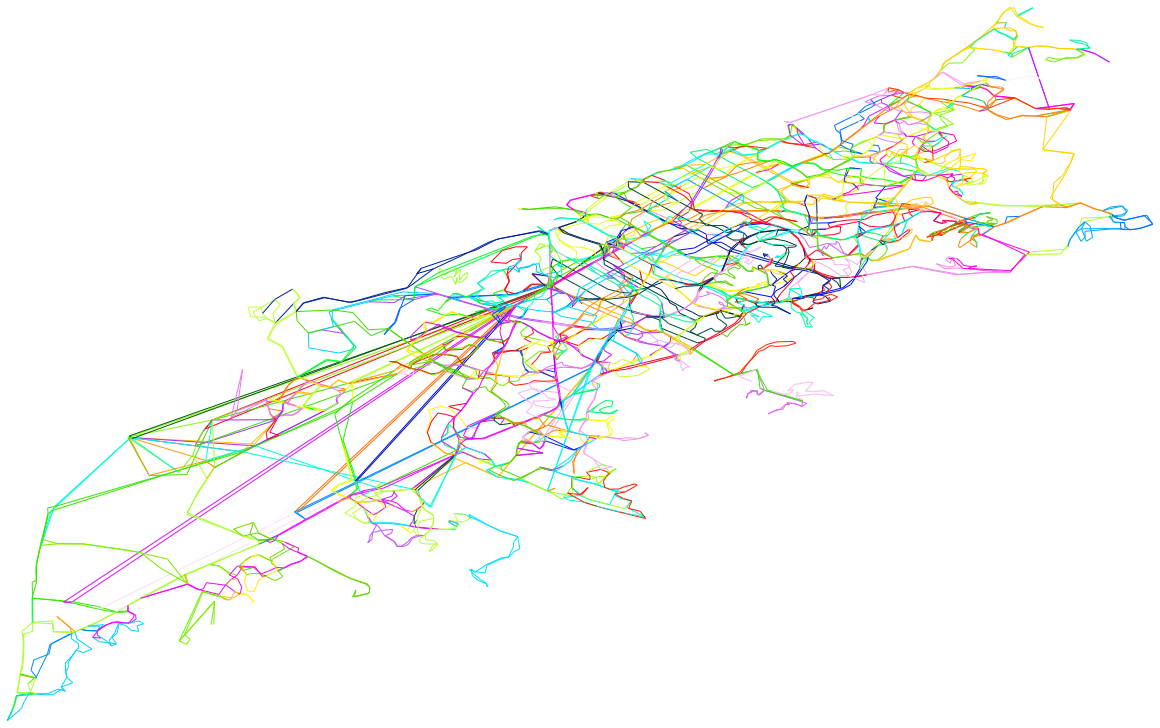

In [9]:
plot_gragh(G)

## Matriu d’Adjacència

Un graf es pot representar per la seva corresponent **matriu d’adjacència** $A = {a_{ij}}$ que, en el cas més simple, serà una matriu simètrica de $V \times V$ elements.

L’element $a_{ij}$ de la matriu $A$ prendrà com a valor $1$ si l’aresta $(i, j)$ pertany a $E$, i $0$ en qualsevol altra cas.

La matriu és simètrica si existeix una aresta que uneix $i$ amb $j$ i també existeix l’aresta que connecti $j$ amb $i$. Llavors $a_{ij}$ = $a_{ji}$.

Les arestes d’una xarxa poden ser també **dirigides** (quan apunten una direcció determinada de l’enllaç entre els dos vèrtexs), **múltiples** (quan més d’una aresta connecta els mateixos nodes), **autoarestes** (quan surten de i arriben a un mateix node) i molts altres tipus diferents que es poden introduir a mesura que la correcta definició d’una xarxa així ho requereixi.

In [10]:
nx.linalg.graphmatrix.adjacency_matrix(G).toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
#Observe this algorithm is only correct for a graph
#with undirected edges
def matriu_adjacencia(G):
    """
    Funció que calcula la matriu adjacent del graf G.
    Per tal d'obtenir els nodes podeu utilizar les funcions:
        - G.nodes per obtenir els nodes.
        - G.edges per obtenir les parelles de nodes.
        
    :param G: graf G
    :return: np.array, la matriu d'adjacència
    """
    nodes = list(G.nodes) 
    v = len(nodes) #Cardinality of vertex
    
    #With this auxiliar python dictionary with the node as a 
    #key and the index (adjacency matrix index) as a value, we 
    #obtain time complexity O(2n)
    index = {nodes[i]:i for i in range(v)}
    
    matrix = np.zeros(shape=(v,v), dtype=np.uint32)
    
    #For every adjacent node increase one unit on the 
    #adjacency matrix
    for node_i, node_j in G.edges:
        matrix[index[node_i],index[node_j]] += 1
        matrix[index[node_j],index[node_i]] += 1
    
    return matrix

In [12]:
adj_matrix = matriu_adjacencia(G)
adj_matrix

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

# Longitud de camí característic

Una de les mesures globals tradicionalment més utilitzades per caracteritzar una xarxa ha estat la de la **longitud de camí característic L**.


Aquest concepte deriva del de *camí d’una xarxa*, que es defineix com la seqüència de nodes que, units per arestes, porten del node $i$ al node $j$. 
La longitud de camí característic es defineix com la mitja dels *camins més curts* calculada per totes les parelles de nodes de la xarxa:

$$L(G) = \frac{1}{N(N-1)} \sum_{i\neq j \in N}l_{ij} = \frac{2}{N(N-1)} \sum_{i>j} l_{ij}
$$

on el camí més curt $l_{ij}$ , en termes d’arestes utilitzades per anar del node i al node j, rep també el nom de camí geodèsic.


In [13]:
def random_subgraph(G, p=0.8):
    """
    Funció que genera un subgraf del graf donat.
    """
    linies = set(G.nodes[n]['IdLinia'] for n in G.nodes)
    linies = set(random.sample(linies, int(len(linies) * p)))
    nodes = [n for n in G.nodes if G.nodes[n]['IdLinia'] in linies]
    Gr = nx.subgraph(G, nodes)
    Gr = max((G.subgraph(c) for c in nx.connected_components(Gr)), key=len)
    return Gr

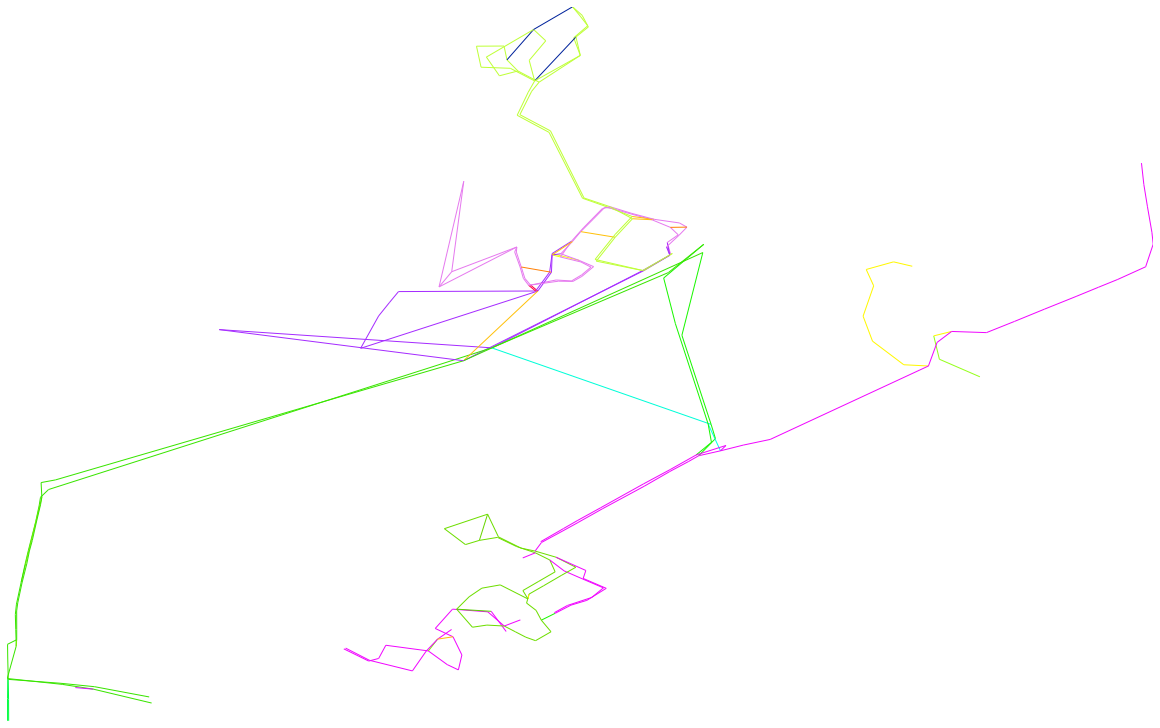

In [14]:
Gr = random_subgraph(G, 0.2)
plot_gragh(Gr)

In [15]:
#duda: forma mas eficiente de hacer parejas?
def longitud_cami_caracteristic(G):
    """
    Funció que calcula la longitud del camí característic.
    
    Per calcular els camins mínims entre dos nodes podeu utilizar la funció:
        - nx.shortest_path_length(graf, node_i, node_j, 'dist')
    
    :param G: graf de la xarxa
    :return: Longitud de camí característic, float
    """
    nodes = list(G.nodes)
    n_nodes = len(nodes)
    
    #In this double loop we compute every minimum distance
    #between every pair of nodes
    min_dists = [nx.shortest_path_length(G, a, b, 'dist') 
                 for i, a in enumerate(nodes) 
                 for b in nodes[i+1:]]
    
    #Finally we only have to apply the formula above
    result = 2/(n_nodes*(n_nodes-1)) * np.sum(min_dists)
    return np.float(result)

In [16]:
nx.average_shortest_path_length(Gr, 'dist')

10044.41411587182

In [17]:
longitud_cami_caracteristic(Gr) 

10044.414115871821

Defnim el **diametre** d'un graf com el cami més llarg entre dos nodes.

In [18]:
def diametre(G):
    """
    Funció que calcula el diametre de la xarxa.
    
    Per calcular els camins mínims entre dos nodes podeu utilizar la funció:
        - nx.shortest_path_length(graf, node_i, node_j, 'dist')
    
    :param G: graf de la xarxa
    :return: diametre, float
    """
    nodes = list(G.nodes)
    v = len(nodes)
    
    #We're supposing not to have negative distances
    max_dist = -1
    
    #For every pair of nodes we compute its minimum distance
    #and we're updating 'max_dist' value
    for node_i in range(v):
        for node_j in range(node_i+1,v):
            dist = nx.shortest_path_length(G, nodes[node_i], nodes[node_j], 'dist')
            if max_dist < dist:
                max_dist = dist
                
    #The diameter of the graph will be equal to 'max_dist' value
    return np.float(max_dist)

In [19]:
diametre(Gr)

22714.227478750498

# Grau d'un node

Una mesura local útil per caracteritzar una xarxa és la de **grau d’un node**, definit pel nombre d’arestes que s’hi connecten i que enllacen, a la vegada, amb els nodes primers veïns. De forma matemàtica, el grau $k_i$ d’un node $i$ és

$$ k_i = \sum_{j\in N} a_{ij}
$$

A partir d’ella podem calcular la distribució estadística del grau en una xarxa, això és la distribució de grau. Si definim $p_k$ com la fracció de nodes d’una xarxa G que tenen grau $k$, $p_k$ serà, al mateix temps, la probabilitat que un node escollit aleatòriament tingui un grau $k$.



In [20]:
def grau_node(adj_matrix):
    """
    Funció que calcula el grau de cada node a partir de la matriu adjacent.
    
    :param adj_matrix: matriu d'ajacencia del graf
    :return : vector amb on a la posició i es troba el grau del node i
    """
    #In this case we only need to return the sum vector
    #on the axis = 0 of the adj_matrix given
    return np.sum(adj_matrix, axis=0)

In [21]:
def nodes_per_grau(graus):
    """
    Funció que retorna un dictionari amb el grau del node i quanitat d'ells que el tenen.
    
    :param graus: vector que retorna la funció grau_node
    :return : diccionari esmentat 
    """
    #Compute the frequency of every degree on the nodes
    #of the graph
    degree, counts = np.unique(graus, return_counts=True)
    return dict(zip(degree,counts))

degree_dic = nodes_per_grau(grau_node(adj_matrix))

In [22]:
degree_hist = pd.DataFrame({"degree": list(degree_dic.values()),
                            "Number of Nodes": list(degree_dic.keys())})

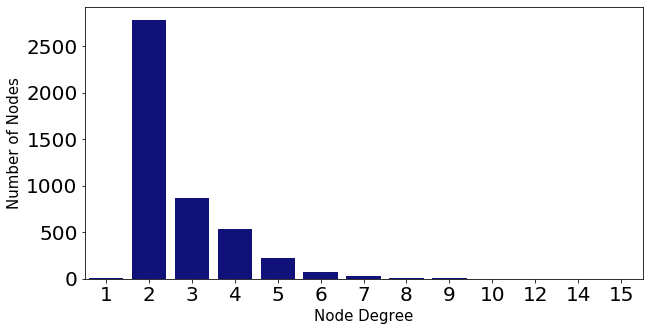

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(y = 'degree', x = 'Number of Nodes', 
              data = degree_hist, 
              color = 'darkblue')
plt.xlabel('Node Degree', fontsize=15)
plt.ylabel('Number of Nodes', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

**Que representa aquesta gràfica? Té sentit aquesta distribució?**

Sabem que el graf al qual fa referència l'anterior histograma, és el graf de les línies de busos que circulen per l'Àrea Metropolitana de Barcelona.

L'histograma representa els valors més freqüents per al grau d'un node (el nombre d'arestes o connexions que hi ha a una parada de bus).

Com podem observar en la distribució de l'histograma veiem que els valors més freqüents per al grau d'una parada de bus són; el 2 (amb molta diferència respecte als altres graus de node), el 3, 4 i en menor mesura el 5, i fins i tot el 6.

Podem dir que aquesta distribució té prou sentit, ja que tractant-se de la xarxa de busos de Barcelona és lògic que aquesta hagi estat dissenyada per tal que les diferents línies de bus vagin a zones diferents de la ciutat. Per tant el més freqüent és que cada parada de bus tingui grau 2, ja que aquestes estan situades de manera que el vehicle pugui arribar a la parada i després pugui sortir (com el graf no és dirigit, això és vàlid pels dos sentits de la línia).

També existeixen casos en què la confluència de diferents línies és major, per tant podem dir que les parades amb graus majors, són parades en zones de Barcelona que estan força transitades o tenen una densitat major (segons l'histograma, les trobem en menor quantitat que qualsevol altra parada).

# Densitat

Tenint en compte el nombre de nodes i d'arestes podem saber quina és l’estructura de la xarxa. Una mesura de l'estructura d'una xarxa és l'anomenada **densitat** que mesura la quanitat d'enllaços respecte tots els possibles que hi ha definits dins de la xarxa. La densitat és $0$ si no hi ha arestes, s'anomena **gràfic buit** i $1$ si tenim un **gràfic complet**, s'estableixen tots els enllaços possibles entre nodes.

$$dens_{undirected} = \frac{2E}{N(N-1)}$$

$$dens_{directed} = \frac{E}{N(N-1)}$$


In [24]:
def densitat(G):
    """
    Funció que calcula la densitat del graf
    
    :param G: graf
    :return : densitat del graf, float
    """
    n_nodes = len(G.nodes) #Cardinality of nodes 
    n_edges = len(G.edges) #Cardinality of edges
    
    #Density for an undirected graph
    return np.float((2*n_edges)/(n_nodes*(n_nodes-1)))

In [25]:
densitat(G)

0.0005966460033901451

In [26]:
nx.density(G)

0.0005966460033901451

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

**Té sentit aquest valor?**

Com podem veure la densitat resultant del graf de la xarxa de busos de l'Àrea Metropolitana de Barcelona és del 0.06% aproximadament.

Una vegada més trobem que aquest valor sí que té sentit, ja que en el graf donat no és gens freqüent que algun dels nodes estigui connectat amb una gran quantitat de nodes del graf (és una xarxa de transport públic on la majoria dels nodes tenen grau 2, 3 o 4). 

Si hi hagués una major densitat, a l'histograma de l'apartat anterior ens sortirien graus més propers a l'ordre de cardinalitat dels vèrtexs del graf, i a més amb molta més freqüència.

# Mitjana (betweenness)

L’anomenada **mitjana d’un node** sorgeix al comprovar com la relació existent entre dos nodes no adjacents pot dependre d’un tercer, especialment si aquest es troba en el camí d’unió dels dos primers.

En conseqüència, els nodes existents en els camins d’unió entre d’altres, poden exercir una influència notable i un control estratègic sobre la resta.

Assumint que un element és important si es troba enmig de la resta d’elements i que la informació (o qualsevol altre producte) viatja tan sols a través de camins geodèsics, si $n_{jk}$ és el nombre de **camins geodèsics** (o més curts) que uneixen els dos vèrtexs $j$ i $k$, i $n_{jk}(i)$ és el nombre de camins geodèsics que uneixen els vèrtexs $j$ i $k$ que contenen el vèrtex $i$, la mitjania del vèrtex $i$ es pot definir com

$$ C^B_i = \frac{1}{(N − 1)(N − 2)} \sum_{j,k\in N} \frac{n_{jk}(i)}{n_{jk}}
$$


on $N$ és el nombre de nodes de la xarxa (utilitzats a l’equació anterior a efectes normalitzadors). $C^B$ pren valors entre $0$ i $1$, essent igual a $1$ en el cas que el vèrtex i estigui present en tots els camins geodèsics del graf.

In [52]:
H = nx.Graph([(1,4),(2,4),(3,4),(4,5)])
print(nx.info(H))
print(nx.betweenness_centrality(H))
print(mitjana(H,4))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000
{4: {}}
{1: 0.0, 4: 1.0, 2: 0.0, 3: 0.0, 5: 0.0}



0.41666666666666663


In [41]:
def mitjana(G, i):
    """
    Funció que calcaula la mitjana d'un node.
    
    Per calcular els camins mínims entre dos nodes podeu utilizar la funció:
        - nx.all_shortest_path(graf, node_i, node_j, 'dist')
        
    :param G: graf
    :param i: float, mijana pel vertex i
    """    
    nodes = list(G.nodes)
    n_nodes = len(nodes)
    
    suma = 0
    index_nodes = list(enumerate(nodes))
    
    #in this loop we're finding in which paths is the node i
    #given in the argument 
    for it, j in tqdm_notebook(index_nodes):
        for k in nodes[it+1:]:
            paths = list(nx.all_shortest_paths(G,k,j,'dist'))
            
            #We need to divide by 2 because here we're 
            #finding the coincidences for i[0] and i[1]
            paths_with_i = np.sum(np.isin(paths,i))/2 
            suma += paths_with_i/len(paths)
    
    #Once we've computed the geodesic paths for i
    #over all the geodesic paths, we simply apply the formula
    return 1/((n_nodes-1)*(n_nodes-2))*suma

In [28]:
Gr = random_subgraph(G, 0.2)
mitjana(Gr, next(iter(Gr.nodes)))

0.15821829163071613

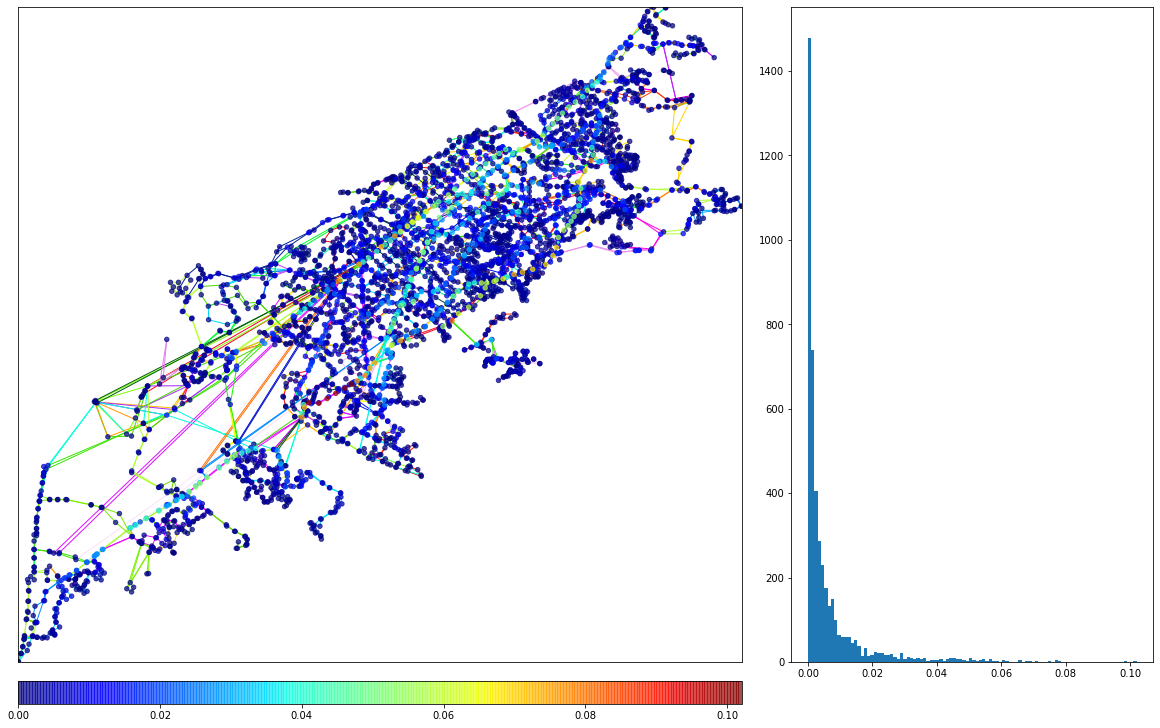

In [91]:
betweenness_centrality = nx.betweenness_centrality(G, weight='dist')
plot_gragh(G, dict(betweenness_centrality))

# Mesura de centralitat

Les mesures de centralitat mesuren la posició d’un actor en una xarxa segons uns certs criteris.

La **centralitat de grau d’un actor** és la més simple de les mesures i es calcula com el nombre dels veins que té entre el total de nodes del graf.

Hi ha gent, la posició favorable de la qual a la xarxa els hi permet ser els iniciadors de processos d’influència com la transmissió de creences, publicitat viral, etc. En aquest cas, el procés comença en un actor i es va transmetent successivament. Una mesura de centralitat que mesuri això ha d’estar basada en contar camins.


In [112]:
def centralitat(G, n):
    """
    Funció que mesura la centralitat del veï n al graf G
    
    :param G: graf
    :param n: node
    :return : float, mesura de centralitat del node n
    """
    #Here we're applying the definition above
    # number of neightbours / cardinality of vertex
    return len(G[n])/len(G.nodes)

centralitat_grau = {node: centralitat(G, node) 
                    for node in tqdm_notebook(G.nodes)}

In [104]:
nx_centrality = nx.degree_centrality(G)

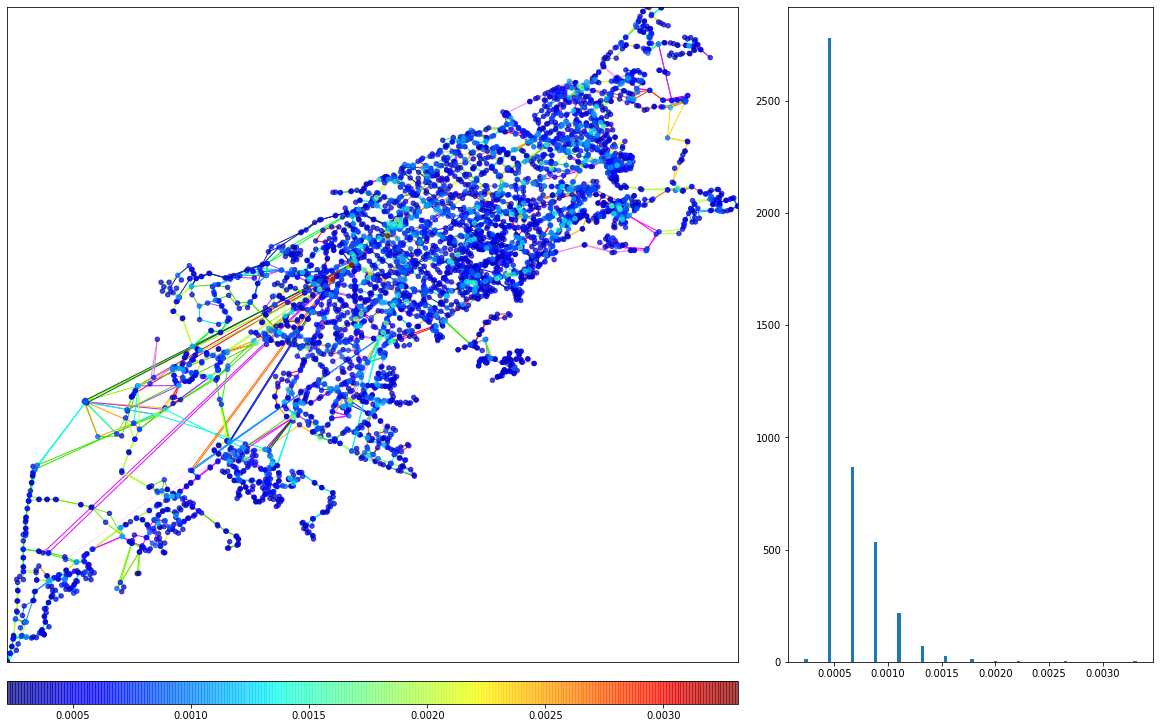

In [105]:
plot_gragh(G, dict(nx_centrality))

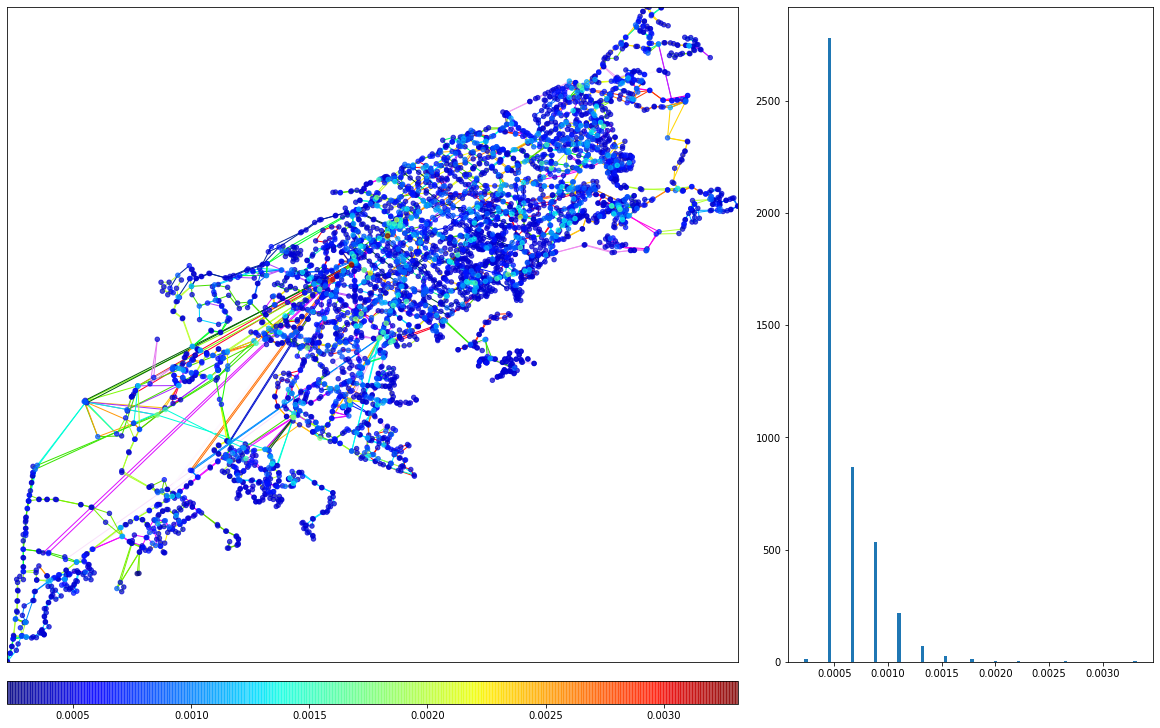

In [106]:
plot_gragh(G, centralitat_grau)

Una altra mesura de posició surt de considerar la distància mitja de cada node a la resta de la xarxa: l’actor que està més a prop de tot altre element de la xarxa és el més central. 

Aquesta mesura és diu **centralitat de rodalies**. Matemàticament, es pot expressar com la inversa de la suma de les distàncies 
$$ c_i = \frac{1}{\sum_j d_{ij}}$$
on $d_{ij}$ és la distància entre l'actor $i$ i l'actor $j$.


In [113]:
def centralitat_rodalies(G, n):
    """
    Funció que calcula la centralitat de rodalies per un node donat.
    
    Per calcular els camins mínims entre dos nodes podeu utilizar la funció:
        - nx.shortest_path_length(graf, node_i, node_j, 'dist')
        
    :param G: graf
    :param n: node
    :return : float, centralitat de rodalies del node n  
    """
    #Compute all the distances between every node and n
    #and then use np.sum to get the summatory
    dist_to_n = [nx.shortest_path_length(G, node_j, n, 'dist') 
                 for node_j in list(G.nodes)]
    dist_sum = np.sum(dist_to_n)
    
    #We need to avoid division by 0
    if dist_sum != 0: return np.float(1/dist_sum)
    else: return 0.0

In [114]:
centralitat_rodalies = centralitat_rodalies(G, next(iter(G.nodes)))

In [116]:
load_centrality = nx.load_centrality(G, weight='dist')

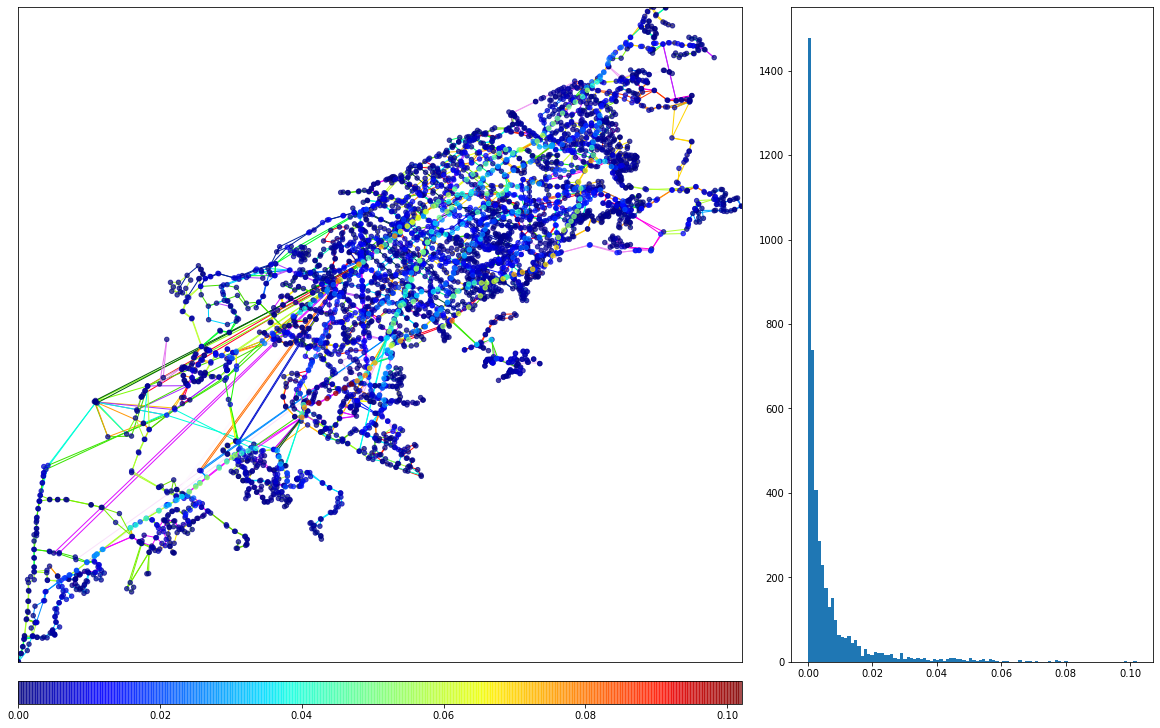

In [117]:
plot_gragh(G, load_centrality)

In [115]:
print(centralitat_rodalies)

8.853698891557738e-09
